In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)

tiff_dir = r'D:\wenqu\chapter1_2\updated_aviris\clipped_aviris\single_aviris_pixel\AVIRIS_NG_ALL'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_023_040_clipped.tif
site1b_024_016_clipped.tif
site1b_024_018_clipped.tif
site1b_024_022_clipped.tif
site1b_024_030_clipped.tif
site1b_024_031_clipped.tif
site1b_025_007_clipped.tif
site1b_025_018_clipped.tif
site1b_025_019_clipped.tif
site1b_025_026_clipped.tif
site1b_025_031_clipped.tif
site1b_025_033_clipped.tif
site1b_025_035_clipped.tif
site1b_025_039_clipped.tif
site1b_025_041_clipped.tif
site1b_025_044_clipped.tif
site1b_026_007_clipped.tif
site1b_026_008_clipped.tif
site1b_026_011_clipped.tif
site1b_026_018_clipped.tif
site1b_026_031_clipped.tif
site1b_026_034_clipped.tif
site1b_027_007_clipped.tif
site1b_027_034_clipped.tif
site1b_027_035_clipped.tif
site1b_027_041_clipped.tif
site1b_027_044_clipped.tif
site1b_028_009_clipped.tif
site1b_028_019_clipped.tif
site1b_028_035_clipped.tif
site1b_029_012_clipped.tif
site1b_029_018_clipped.tif
site1b_029_020_clipped.tif
site1b_029_021_clipped.tif
site1b_029_026_clipped.tif
site1b_029_028_clipped.tif
site1b_029_030_clipped.tif
s

site2c_020_015_clipped.tif
site2c_020_017_clipped.tif
site2c_020_018_clipped.tif
site2c_020_019_clipped.tif
site2c_020_020_clipped.tif
site2c_020_021_clipped.tif
site2c_020_024_clipped.tif
site2c_020_025_clipped.tif
site2c_020_027_clipped.tif
site2c_020_029_clipped.tif
site2c_021_008_clipped.tif
site2c_021_010_clipped.tif
site2c_021_013_clipped.tif
site2c_021_017_clipped.tif
site2c_021_021_clipped.tif
site2c_021_023_clipped.tif
site2c_021_027_clipped.tif
site2c_021_029_clipped.tif
site2c_022_010_clipped.tif
site2c_022_012_clipped.tif
site2c_022_014_clipped.tif
site2c_022_018_clipped.tif
site2c_022_020_clipped.tif
site2c_022_023_clipped.tif
site2c_022_026_clipped.tif
site2c_022_031_clipped.tif
site2c_023_012_clipped.tif
site2c_023_015_clipped.tif
site2c_023_017_clipped.tif
site2c_023_021_clipped.tif
site2c_023_023_clipped.tif
site2c_023_027_clipped.tif
site2c_023_029_clipped.tif
site2c_024_016_clipped.tif
site2c_024_019_clipped.tif
site2c_024_022_clipped.tif
site2c_024_024_clipped.tif
s

In [3]:
df_spectral = df
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_023_040_clipped.tif,0.045220,0.041748,0.042282,0.040922,0.042815,0.040010,0.037958,0.038371,0.036112,...,0.063685,0.051910,0.061370,0.053125,0.066676,0.057680,0.123556,0.088136,0.087504,-0.010000
1,site1b_024_016_clipped.tif,0.048939,0.046364,0.044615,0.044824,0.042590,0.039332,0.038095,0.037492,0.035918,...,0.037516,0.043186,0.039395,0.042552,0.054276,0.164978,0.090032,0.068948,0.083395,-0.010000
2,site1b_024_018_clipped.tif,0.048934,0.044142,0.042059,0.039934,0.039587,0.036803,0.035807,0.036525,0.034081,...,0.041784,0.037559,0.048106,0.054135,0.042648,0.037521,0.103987,0.062151,0.062152,-0.010000
3,site1b_024_022_clipped.tif,0.049881,0.048410,0.043863,0.044790,0.042539,0.038298,0.037221,0.036300,0.034691,...,0.066684,0.057506,0.059021,0.071539,0.063961,0.076524,0.073048,0.074294,0.098398,-0.010000
4,site1b_024_030_clipped.tif,0.048836,0.046687,0.043086,0.041445,0.043002,0.039869,0.038701,0.039223,0.037710,...,0.075644,0.057538,0.068110,0.038588,0.080825,0.092814,0.107196,0.084620,0.077490,-0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,site6_042_015_clipped.tif,-0.003340,0.003155,0.017650,0.018009,0.015459,0.020730,0.023494,0.025731,0.030994,...,0.038051,0.030980,0.034752,0.044831,0.042501,0.092755,0.257981,0.484898,0.159373,0.092913
487,site6_042_016_clipped.tif,0.008943,0.007896,0.007634,0.015753,0.013599,0.017015,0.023189,0.024993,0.028764,...,0.032711,0.035739,0.030486,0.032831,0.038375,0.070894,0.355065,0.474034,0.154094,0.129242
488,site6_042_018_clipped.tif,0.000186,0.012608,0.009611,0.010311,0.015097,0.018495,0.021392,0.023485,0.028191,...,0.038117,0.039125,0.039810,0.037464,0.048825,0.067460,0.337004,0.461615,0.209279,0.127228
489,site6_043_014_clipped.tif,0.026495,0.020796,0.011097,0.016414,0.022082,0.019381,0.024834,0.027200,0.028562,...,0.037894,0.032838,0.039078,0.050901,0.035203,0.059085,0.319345,0.608585,0.202879,0.109175


In [4]:
print(df_spectral['filename'])

0      site1b_023_040_clipped.tif
1      site1b_024_016_clipped.tif
2      site1b_024_018_clipped.tif
3      site1b_024_022_clipped.tif
4      site1b_024_030_clipped.tif
                  ...            
486     site6_042_015_clipped.tif
487     site6_042_016_clipped.tif
488     site6_042_018_clipped.tif
489     site6_043_014_clipped.tif
490     site6_044_013_clipped.tif
Name: filename, Length: 491, dtype: object


In [5]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [6]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [7]:
x_spectra.shape

(491, 319)

In [8]:
labels = [] 
for i in range(len(df_spectral['filename'])):
    substrings = df_spectral['filename'][i]
    site_name = substrings.split("_")[0]
    labels.append(site_name)

In [9]:
print(len(labels), labels)


491 ['site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site

In [10]:
# Define the updated PLS model function
def plot_mse_vs_components(X, y, max_comp):
    """
    Perform PLS variable selection and optimize the number of components.

    Parameters:
    X (numpy.ndarray): Predictor variables.
    y (numpy.ndarray): Response variable.
    max_comp (int): Maximum number of PLS components.

    Returns:
    tuple: Reduced predictor variables, optimized number of components, wavelength index to keep, sorted indices.
    """
    # Initialize an MSE array
    mse = np.zeros((max_comp, X.shape[1] - max_comp + 1))

    # Loop over the number of PLS components
    for i in range(max_comp):
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)

        # Sort features by importance
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
        Xc = X[:, sorted_ind]

        # Evaluate MSE for feature subsets
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1])
        for j in range(max_j):
            pls2 = PLSRegression(n_components=i + 1)
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))

        stdout.write(f"\r{i+1}/{max_comp} components processed")
        stdout.flush()

    stdout.write("\n")

    # Handle edge case for empty mse
    non_zero_mse = mse[np.nonzero(mse)]
    if non_zero_mse.size == 0:
        raise ValueError("MSE array contains no valid values. Check your data.")

    # Find optimal number of components and features to keep
    mseminx, mseminy = np.where(mse == np.min(non_zero_mse))
    print("Optimized number of PLS components:", mseminx[0] + 1)
    print("Wavelengths to keep from index:", mseminy[0])
    print("Optimized MSEP:", mse[mseminx, mseminy][0])

    # Final fit with optimal components
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
    Xc = X[:, sorted_ind]

    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind




In [11]:

def simple_pls_cv_label_category(X, y,df_array, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        filtered_filenames = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i], df_array[i, 1])
                csvwriter.writerow([i, label, y_cv[i], y[i], df_array[i, 1]])
                 # Check the conditions and print filename when they are satisfied
#                     
#                 if  y_cv[i] < -0.75 and label == 'site1b':
                if  0.5< y[i] <1 and -0.5<y_cv[i] < 0 and label == 'site6':
                    
                    filtered_filenames.append(df_array[i, 1])  # Assuming filename is stored in df_array[i, 1]
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)
            
        print("Filenames meeting the conditions:")
        for fname in filtered_filenames:
            print(fname)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


R2 calib: 0.508
R2 CV: 0.152
MSE calib: 0.047
MSE CV: 0.081
0.3148314487721934 0.2787533748458759
None
0 site1b 0.38219346409909033 [0.17573313] site1b_023_040_clipped.tif
1 site1b 0.2910884337335152 [0.448474] site1b_024_016_clipped.tif
2 site1b 0.21809045285896206 [0.5702366] site1b_024_018_clipped.tif
3 site1b 0.09153605376280366 [0.37622622] site1b_024_022_clipped.tif
4 site1b 0.28163831665874445 [0.46791926] site1b_024_030_clipped.tif
5 site1b 0.4190258177983495 [0.47249887] site1b_024_031_clipped.tif
6 site1b 0.2891593163377118 [0.36982399] site1b_025_007_clipped.tif
7 site1b 0.2207864917379037 [0.5592607] site1b_025_018_clipped.tif
8 site1b 0.4083602251997643 [0.44670677] site1b_025_019_clipped.tif
9 site1b 0.09162725812304423 [0.31244577] site1b_025_026_clipped.tif
10 site1b 0.4203205897941334 [0.32021115] site1b_025_031_clipped.tif
11 site1b 0.4022038862556873 [0.47702289] site1b_025_033_clipped.tif
12 site1b 0.4730127177720901 [0.63742931] site1b_025_035_clipped.tif
13 site1b

417 site6 0.8734214428080264 [0.52592027] site6_020_046_clipped.tif
418 site6 0.9348015408392775 [0.9090645] site6_020_047_clipped.tif
419 site6 0.4034901557979532 [0.86951378] site6_020_049_clipped.tif
420 site6 0.8302326719088621 [0.61301633] site6_021_040_clipped.tif
421 site6 0.27488172556526413 [0.64931201] site6_021_043_clipped.tif
422 site6 0.41604840855592273 [0.53111852] site6_021_044_clipped.tif
423 site6 0.37041894343588366 [0.56296053] site6_021_045_clipped.tif
424 site6 0.7725240721802663 [0.30084039] site6_021_046_clipped.tif
425 site6 0.4037222333652212 [0.86682742] site6_021_048_clipped.tif
426 site6 0.5727691587221316 [0.61061016] site6_022_039_clipped.tif
427 site6 0.6070367917240912 [0.41438695] site6_022_041_clipped.tif
428 site6 0.5030713493390387 [0.45321955] site6_022_042_clipped.tif
429 site6 0.672715341373111 [0.53211703] site6_022_043_clipped.tif
430 site6 0.5442824100434817 [0.63145774] site6_022_044_clipped.tif
431 site6 0.7844286012093736 [0.80995606] site6

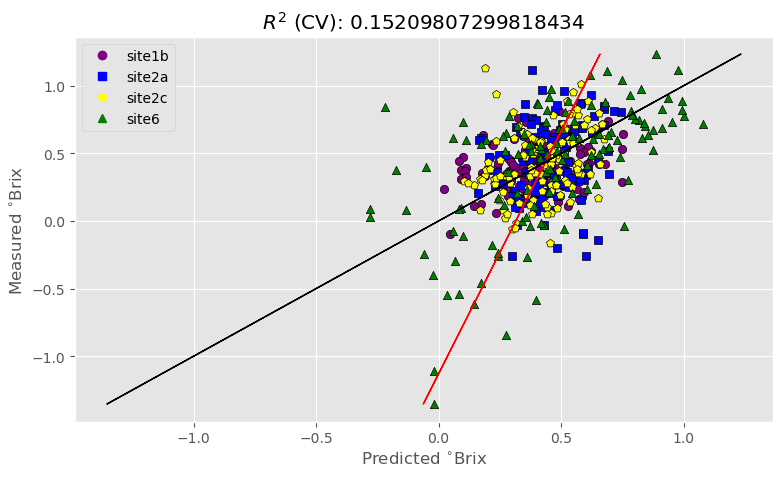

In [21]:
# opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(X_pn_ymax, y_pn_max, 20)

file_name_pn_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\pn_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pn_max,
                             y_pn_max,
                             y_pn_max_df_array,
                             ncomp_pn_max, labels, file_name_pn_max)

# d13c

In [12]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_d13c.npy',  allow_pickle=True)

In [13]:
d13c_trait_pdf_ymax.shape

(491, 2)

In [14]:
y_d13c_max_df = pd.DataFrame(d13c_trait_pdf_ymax, columns=['y_value', 'filename'])
y_d13c_max_df['filename'] = y_d13c_max_df['filename'].str.replace('d13c_', '')

y_d13c_max_df['y_value'] = pd.to_numeric(y_d13c_max_df['y_value'])
y_d13c_max_df_array = y_d13c_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d13c_max_df = pd.merge(df_spectral, y_d13c_max_df, on='filename')
#  # Band columns as predictors
merged_y_d13c_max_df   
X_d13c_ymax = merged_y_d13c_max_df.filter(regex='^band_').values 
y_d13c_max = merged_y_d13c_max_df[['y_value']].values  

In [15]:
X_d13c_ymax.shape

(491, 425)

In [16]:
y_d13c_max_df_array[:,1]

array(['site1b_023_040_clipped.tif', 'site1b_024_016_clipped.tif',
       'site1b_024_018_clipped.tif', 'site1b_024_022_clipped.tif',
       'site1b_024_030_clipped.tif', 'site1b_024_031_clipped.tif',
       'site1b_025_007_clipped.tif', 'site1b_025_018_clipped.tif',
       'site1b_025_019_clipped.tif', 'site1b_025_026_clipped.tif',
       'site1b_025_031_clipped.tif', 'site1b_025_033_clipped.tif',
       'site1b_025_035_clipped.tif', 'site1b_025_039_clipped.tif',
       'site1b_025_041_clipped.tif', 'site1b_025_044_clipped.tif',
       'site1b_026_007_clipped.tif', 'site1b_026_008_clipped.tif',
       'site1b_026_011_clipped.tif', 'site1b_026_018_clipped.tif',
       'site1b_026_031_clipped.tif', 'site1b_026_034_clipped.tif',
       'site1b_027_007_clipped.tif', 'site1b_027_034_clipped.tif',
       'site1b_027_035_clipped.tif', 'site1b_027_041_clipped.tif',
       'site1b_027_044_clipped.tif', 'site1b_028_009_clipped.tif',
       'site1b_028_019_clipped.tif', 'site1b_028_035_clipped.t

In [17]:
# Call the model function
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max  = plot_mse_vs_components(X_d13c_ymax, y_d13c_max, 20)
# opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(X_d13c_std1, y_d13c_std1, 50)


20/20 components processed
Optimized number of PLS components: 9
Wavelengths to keep from index: 404
Optimized MSEP: 0.4554443088090274


In [18]:
X_d13c_ymax.shape

(491, 425)

R2 calib: 0.525
R2 CV: 0.452
MSE calib: 0.175
MSE CV: 0.202
-14.256220594256327 0.4967719039311644
None
0 site1b -28.533034197943582 [-28.62210041] site1b_023_040_clipped.tif
1 site1b -28.248287882887976 [-28.77393706] site1b_024_016_clipped.tif
2 site1b -28.304669398477152 [-28.36289914] site1b_024_018_clipped.tif
3 site1b -28.061578652194335 [-28.67673126] site1b_024_022_clipped.tif
4 site1b -27.962036405949842 [-28.86345562] site1b_024_030_clipped.tif
5 site1b -27.958478925679387 [-28.58319538] site1b_024_031_clipped.tif
6 site1b -27.92915680934109 [-28.35345048] site1b_025_007_clipped.tif
7 site1b -28.29618654752962 [-27.94519605] site1b_025_018_clipped.tif
8 site1b -28.105690709367636 [-28.35709676] site1b_025_019_clipped.tif
9 site1b -28.24271760080421 [-28.36269836] site1b_025_026_clipped.tif
10 site1b -28.37331184608193 [-28.19644267] site1b_025_031_clipped.tif
11 site1b -28.328602145411242 [-28.64342073] site1b_025_033_clipped.tif
12 site1b -28.26584498484951 [-28.27383201] si

434 site6 -29.25791172995056 [-28.8619774] site6_023_040_clipped.tif
435 site6 -28.72944556643912 [-28.8824166] site6_023_041_clipped.tif
436 site6 -29.057967308046013 [-29.28793217] site6_023_042_clipped.tif
437 site6 -28.717836911358322 [-28.95847704] site6_023_043_clipped.tif
438 site6 -29.353745214856666 [-29.55402615] site6_024_037_clipped.tif
439 site6 -29.347589454035734 [-28.22597115] site6_024_039_clipped.tif
440 site6 -29.411681868431806 [-29.2276644] site6_024_040_clipped.tif
441 site6 -28.681847462635726 [-28.81648489] site6_024_041_clipped.tif
442 site6 -29.121287485986002 [-29.13971119] site6_024_042_clipped.tif
443 site6 -29.03583033382491 [-28.25945142] site6_025_036_clipped.tif
444 site6 -29.382676933107682 [-29.34353749] site6_025_038_clipped.tif
445 site6 -29.31258045996833 [-30.47862768] site6_025_039_clipped.tif
446 site6 -28.996974687783627 [-29.02654384] site6_026_035_clipped.tif
447 site6 -29.0414180953284 [-28.83122623] site6_026_037_clipped.tif
448 site6 -29.1

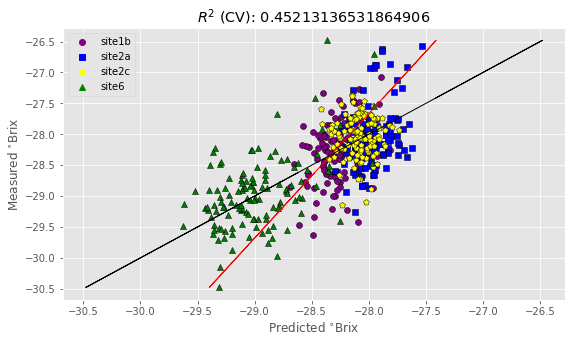

In [19]:
file_name_d13c_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\d13c_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max, 
                             y_d13c_max,
                             y_d13c_max_df_array, 
                             ncomp_d13c_max, labels, file_name_d13c_max)

# d13 std

In [20]:
y_d13c_std_df = pd.DataFrame(d13c_trait_pdf_std, columns=['y_value', 'filename'])
y_d13c_std_df['filename'] = y_d13c_std_df['filename'].str.replace('d13c_', '')

y_d13c_std_df['y_value'] = pd.to_numeric(y_d13c_std_df['y_value'])

y_d13c_std_df_array = y_d13c_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d13c_std_df = pd.merge(df_spectral, y_d13c_std_df, on='filename')
 # Band columns as predictors
    
X_d13c_std = merged_y_d13c_std_df.filter(regex='^band_').values 
y_d13c_std = merged_y_d13c_std_df[['y_value']].values  

In [21]:
print(X_d13c_std.shape, y_d13c_std.shape)

(491, 425) (491, 1)


In [23]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(X_d13c_std, y_d13c_std, 50)

50/50 components processed
Optimized number of PLS components: 16
Wavelengths to keep from index: 307
Optimized MSEP: 0.3051752507530213


R2 calib: 0.903
R2 CV: 0.766
MSE calib: 0.032
MSE CV: 0.078
0.2434512912215901 0.8028412790540351
None
0 site1b 0.6690513020373335 [0.74795224] site1b_023_040_clipped.tif
1 site1b 0.853250186731725 [0.68955457] site1b_024_016_clipped.tif
2 site1b 1.0011213538064678 [0.74811219] site1b_024_018_clipped.tif
3 site1b 0.6138464038175215 [0.67136062] site1b_024_022_clipped.tif
4 site1b 0.9375835762135416 [0.76915112] site1b_024_030_clipped.tif
5 site1b 1.0846159495847703 [0.7967993] site1b_024_031_clipped.tif
6 site1b 1.1913422271753726 [0.817875] site1b_025_007_clipped.tif
7 site1b 0.7720259178082733 [0.71925879] site1b_025_018_clipped.tif
8 site1b 0.7912409281116533 [0.72281966] site1b_025_019_clipped.tif
9 site1b 0.8297415002928343 [0.75222742] site1b_025_026_clipped.tif
10 site1b 0.968946633364645 [0.76792827] site1b_025_031_clipped.tif
11 site1b 0.8690552255749275 [0.78642484] site1b_025_033_clipped.tif
12 site1b 0.7823364166980095 [0.83017114] site1b_025_035_clipped.tif
13 site1b 0.824

440 site6 1.8981298121972032 [1.92074934] site6_024_040_clipped.tif
441 site6 2.148356930151726 [2.53649642] site6_024_041_clipped.tif
442 site6 1.7059655265222113 [1.84249131] site6_024_042_clipped.tif
443 site6 1.5616387514436045 [1.78563685] site6_025_036_clipped.tif
444 site6 2.3310852169388117 [2.1095155] site6_025_038_clipped.tif
445 site6 1.9987082861104422 [2.01319265] site6_025_039_clipped.tif
446 site6 2.7175921059046324 [3.01080941] site6_026_035_clipped.tif
447 site6 2.21112094485415 [2.38906068] site6_026_037_clipped.tif
448 site6 2.619433526241634 [2.25463698] site6_026_038_clipped.tif
449 site6 1.6770334018786144 [2.35428959] site6_027_036_clipped.tif
450 site6 2.4021608193974036 [2.02047502] site6_027_037_clipped.tif
451 site6 2.3100483045942424 [2.15147843] site6_028_035_clipped.tif
452 site6 2.239634688870874 [2.02463887] site6_028_036_clipped.tif
453 site6 2.069595862563567 [2.98347936] site6_029_031_clipped.tif
454 site6 2.5341303425555353 [3.78473767] site6_029_033

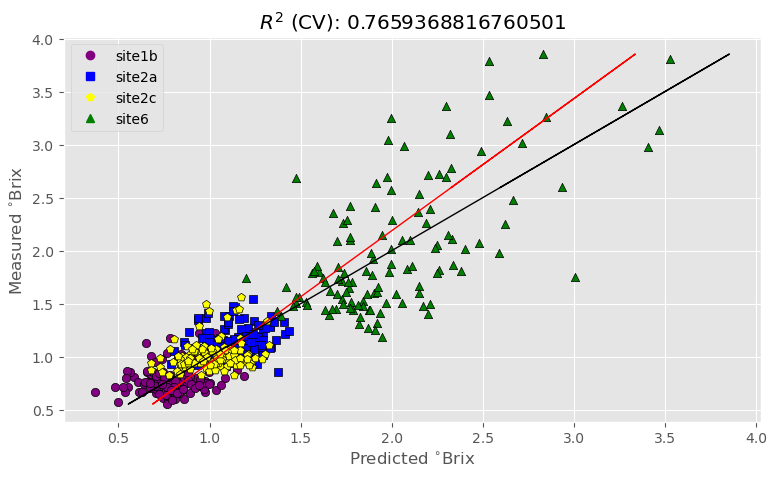

In [24]:
file_name_d13c_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,
                             y_d13c_std,
                             y_d13c_std_df_array,
                             ncomp_d13c_std, labels,file_name_d13c_std)

In [101]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_d13c_std, y_d13c_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d13c_std][wav_d13c_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(97,) (97,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.75123765,  0.47086128, -1.14891228, -0.61356492, -0.55592246,
        0.76746221, -0.78288668, -0.91440532, -0.07992538,  0.23790506,
       -1.0787358 , -0.32882069, -0.26340681, -0.06209026, -0.97924471,
       -0.84576425, -0.80787134,  0.34670278,  0.26869252,  0.08445761,
        1.11991098, -1.02876745, -1.10201886, -1.03926714, -0.61776357,
        1.25427691, -0.69378976, -0.81435383,  1.51673142,  1.05002659,
        0.55028571, -1.07768084,  0.87790966,  0.90685627,  0.66918669,
       -0.89463962, -0.40025062, -0.18786073, -0.4190451 , -0.62768171,
        0.68012136,  0.90123902,  1.19163553,  0.16572773, -0.68027775,
       -1.221056  , -1.67141034,  0.6259596 ,  0.74897312,  1.10817916,
        0.42589831, -1.07135526, -0.17457684,  1.40451759,  0.26018834,
        1.17683996,  0.48649331, -0.66496095,  0.74692697,  0.65585157,
       -1.0070635 ,  0.3287343 , -1.31864424, -1.00617669,  0.34092269,
        0.54156882, -0.40321738,  0.94827689, -0.97057888,  0.97

In [102]:
optimal_pls_sla.intercept_

array([2.38762773])

In [103]:
bands_sla

array(['band_97', 'band_216', 'band_252', 'band_19', 'band_83', 'band_30',
       'band_37', 'band_121', 'band_106', 'band_233', 'band_350',
       'band_270', 'band_28', 'band_157', 'band_88', 'band_174',
       'band_96', 'band_400', 'band_170', 'band_278', 'band_241',
       'band_384', 'band_364', 'band_365', 'band_279', 'band_137',
       'band_222', 'band_34', 'band_158', 'band_258', 'band_180',
       'band_249', 'band_380', 'band_118', 'band_91', 'band_171',
       'band_25', 'band_337', 'band_81', 'band_345', 'band_128',
       'band_52', 'band_59', 'band_45', 'band_221', 'band_334',
       'band_224', 'band_285', 'band_373', 'band_235', 'band_92',
       'band_251', 'band_265', 'band_26', 'band_165', 'band_94',
       'band_21', 'band_387', 'band_113', 'band_31', 'band_176',
       'band_50', 'band_156', 'band_173', 'band_71', 'band_404',
       'band_335', 'band_42', 'band_40', 'band_256', 'band_103',
       'band_44', 'band_145', 'band_226', 'band_65', 'band_381',
       'b

# d15n

In [25]:
d15n_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_d15n.npy',  allow_pickle=True)

In [26]:
y_d15n_max = np.array(d15n_trait_pdf_ymax)
y_d15n_std = np.array(d15n_trait_pdf_std)

In [27]:
y_d15n_max.shape

(491, 2)

In [28]:
y_d15n_max_df = pd.DataFrame(y_d15n_max, columns=['y_value', 'filename'])
y_d15n_max_df['filename'] = y_d15n_max_df['filename'].str.replace('d15n_', '')

y_d15n_max_df['y_value'] = pd.to_numeric(y_d15n_max_df['y_value'])
y_d15n_max_df_array = y_d15n_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d15n_max_df = pd.merge(df_spectral, y_d15n_max_df, on='filename')
 # Band columns as predictors
    
X_d15n_ymax = merged_y_d15n_max_df.filter(regex='^band_').values 
y_d15n_max = merged_y_d15n_max_df[['y_value']].values  

In [29]:
y_d15n_std_df = pd.DataFrame(y_d15n_std, columns=['y_value', 'filename'])
y_d15n_std_df['filename'] = y_d15n_std_df['filename'].str.replace('d15n_', '')

y_d15n_std_df['y_value'] = pd.to_numeric(y_d15n_std_df['y_value'])
y_d15n_std_df_array = y_d15n_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d15n_std_df = pd.merge(df_spectral, y_d15n_std_df, on='filename')
 # Band columns as predictors
    
X_d15n_std = merged_y_d15n_std_df.filter(regex='^band_').values 
y_d15n_std = merged_y_d15n_std_df[['y_value']].values  

In [30]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(X_d15n_ymax, y_d15n_max, 20)


20/20 components processed
Optimized number of PLS components: 9
Wavelengths to keep from index: 330
Optimized MSEP: 0.8626585321848268


In [31]:
opt_Xc_d15n_max.shape

(491, 95)

R2 calib: 0.489
R2 CV: 0.303
MSE calib: 0.532
MSE CV: 0.725
-1.1744904442448436 0.3890452044244512
None
0 site1b -1.3628594579826943 [-0.37646202] site1b_023_040_clipped.tif
1 site1b -2.0401772472103783 [-1.86782115] site1b_024_016_clipped.tif
2 site1b -2.1362714208616707 [-1.00739298] site1b_024_018_clipped.tif
3 site1b -1.9968011923271676 [-0.64874024] site1b_024_022_clipped.tif
4 site1b -1.8089445291495683 [-1.46542233] site1b_024_030_clipped.tif
5 site1b -1.4787180990849773 [-1.69189084] site1b_024_031_clipped.tif
6 site1b -2.090851430038084 [-2.71486109] site1b_025_007_clipped.tif
7 site1b -1.756619134448797 [-1.43816206] site1b_025_018_clipped.tif
8 site1b -2.1825352872510817 [-2.11365908] site1b_025_019_clipped.tif
9 site1b -2.1573834429278387 [-1.61596838] site1b_025_026_clipped.tif
10 site1b -1.5786307629174425 [-1.34506262] site1b_025_031_clipped.tif
11 site1b -1.2152276520255816 [-1.46947272] site1b_025_033_clipped.tif
12 site1b -1.1129247256787567 [-1.57158176] site1b_025_0

339 site2c -1.7491912245834005 [-2.02272991] site2c_021_029_clipped.tif
340 site2c -1.4408862460855878 [-2.61115488] site2c_022_010_clipped.tif
341 site2c -1.8880715506811647 [-3.13136792] site2c_022_012_clipped.tif
342 site2c -2.2466020289009743 [-3.73536906] site2c_022_014_clipped.tif
343 site2c -1.5211740318819817 [-0.11967718] site2c_022_018_clipped.tif
344 site2c -1.6256005920721712 [-1.43168414] site2c_022_020_clipped.tif
345 site2c -2.2480284138183007 [-1.31654914] site2c_022_023_clipped.tif
346 site2c -1.902326627756029 [-1.09266511] site2c_022_026_clipped.tif
347 site2c -2.296729493809827 [-2.89122005] site2c_022_031_clipped.tif
348 site2c -1.8090327220621787 [-2.72291837] site2c_023_012_clipped.tif
349 site2c -1.961509277383287 [-2.85543733] site2c_023_015_clipped.tif
350 site2c -1.3361239935574862 [-2.99363781] site2c_023_017_clipped.tif
351 site2c -1.6566947082471677 [-2.17753969] site2c_023_021_clipped.tif
352 site2c -2.5719357973252226 [-2.28686149] site2c_023_023_clipped

Filenames meeting the conditions:


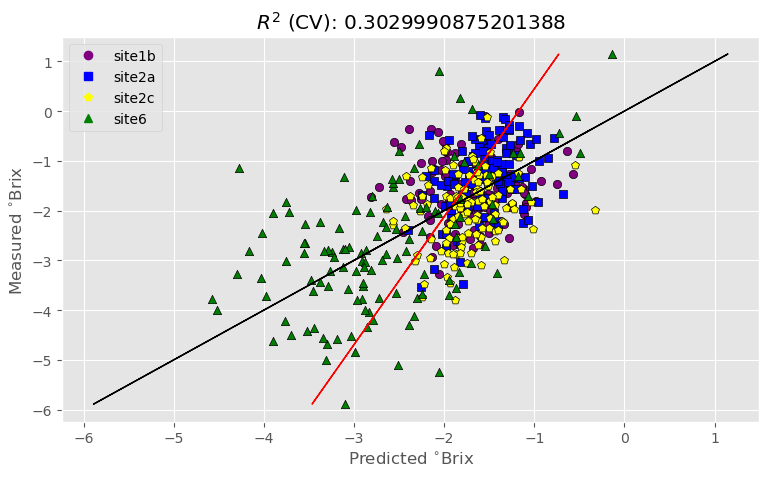

In [32]:
file_name_d15n_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,
                             y_d15n_max,
                             y_d15n_max_df_array,
                             ncomp_d15n_max, labels, file_name_d15n_max)

In [33]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(X_d15n_std, y_d15n_std, 30)



30/30 components processed
Optimized number of PLS components: 20
Wavelengths to keep from index: 378
Optimized MSEP: 0.4910443426629645


R2 calib: 0.836
R2 CV: 0.696
MSE calib: 0.101
MSE CV: 0.188
0.6421260228842341 0.6994534390170536
None
0 site1b 1.349976530573697 [1.36371729] site1b_023_040_clipped.tif
1 site1b 1.6444816395250847 [1.18391917] site1b_024_016_clipped.tif
2 site1b 2.0189986556862287 [1.24221879] site1b_024_018_clipped.tif
3 site1b 1.627114646774734 [1.03795941] site1b_024_022_clipped.tif
4 site1b 1.8578798740134772 [1.19901343] site1b_024_030_clipped.tif
5 site1b 1.776214483971565 [1.17749233] site1b_024_031_clipped.tif
6 site1b 1.8918100273391998 [1.75064007] site1b_025_007_clipped.tif
7 site1b 1.4938432147428033 [1.24788694] site1b_025_018_clipped.tif
8 site1b 1.9461390376083862 [1.36962354] site1b_025_019_clipped.tif
9 site1b 1.6167423856992955 [1.29898987] site1b_025_026_clipped.tif
10 site1b 1.6617997489343508 [1.19266341] site1b_025_031_clipped.tif
11 site1b 1.48171127540928 [1.50495706] site1b_025_033_clipped.tif
12 site1b 1.3166544544719425 [1.4656986] site1b_025_035_clipped.tif
13 site1b 1.1903

300 site2c 2.2638742856035865 [2.48094117] site2c_018_024_clipped.tif
301 site2c 2.371231282922533 [2.67784104] site2c_018_027_clipped.tif
302 site2c 2.1739388658818912 [2.80779701] site2c_018_028_clipped.tif
303 site2c 2.1097820691449796 [2.45861584] site2c_018_030_clipped.tif
304 site2c 1.9144862882243618 [2.08703858] site2c_019_006_clipped.tif
305 site2c 1.777233020574652 [2.12235393] site2c_019_008_clipped.tif
306 site2c 1.4380644077605698 [1.80492721] site2c_019_010_clipped.tif
307 site2c 1.9456815023528988 [1.53650666] site2c_019_011_clipped.tif
308 site2c 1.7363093165652104 [1.51767364] site2c_019_012_clipped.tif
309 site2c 2.2178705579446722 [1.5126765] site2c_019_014_clipped.tif
310 site2c 1.5852348559378326 [1.5773902] site2c_019_015_clipped.tif
311 site2c 1.9478277094685532 [2.00876325] site2c_019_017_clipped.tif
312 site2c 2.071247277008908 [2.29413811] site2c_019_018_clipped.tif
313 site2c 1.8155131740647112 [1.79338695] site2c_019_020_clipped.tif
314 site2c 1.864330407894

456 site6 3.3733607737937232 [3.36771877] site6_030_030_clipped.tif
457 site6 3.0681864853002345 [4.02723249] site6_030_032_clipped.tif
458 site6 4.139338359135387 [4.71124503] site6_030_033_clipped.tif
459 site6 2.93075308808538 [2.8836014] site6_031_027_clipped.tif
460 site6 4.221583282350657 [4.25138004] site6_031_031_clipped.tif
461 site6 3.3994274736588803 [4.2376888] site6_031_032_clipped.tif
462 site6 3.3472637610743647 [3.10315243] site6_032_025_clipped.tif
463 site6 3.1445137553591644 [2.91740283] site6_032_026_clipped.tif
464 site6 3.4035501684552854 [4.15578687] site6_032_030_clipped.tif
465 site6 3.889276336148968 [3.75981828] site6_032_031_clipped.tif
466 site6 3.4015471502255856 [3.06843901] site6_033_024_clipped.tif
467 site6 3.389385159730323 [2.9888395] site6_033_025_clipped.tif
468 site6 3.795588119724475 [3.7507997] site6_033_029_clipped.tif
469 site6 3.143756042760949 [2.91892682] site6_034_023_clipped.tif
470 site6 3.695731421672976 [3.16616311] site6_034_024_clipp

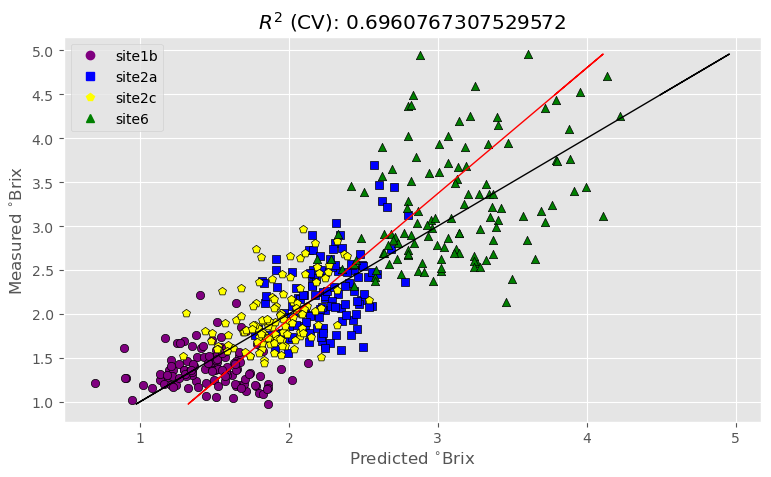

In [34]:
file_name_d15n_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,
                             y_d15n_std,
                             y_d15n_std_df_array,
                             ncomp_d15n_std, labels, file_name_d15n_std)

# LA

In [12]:
la_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_la.npy',  allow_pickle=True)

In [13]:
y_la_max = np.array(la_trait_pdf_ymax)

y_la_std = np.array(la_trait_pdf_std)

In [14]:
y_la_std.shape

(491, 2)

In [15]:
y_la_max_df = pd.DataFrame(y_la_max, columns=['y_value', 'filename'])
y_la_max_df['filename'] = y_la_max_df['filename'].str.replace('la_', '')

y_la_max_df['y_value'] = pd.to_numeric(y_la_max_df['y_value'])
y_la_max_df_array = y_la_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_la_max_df = pd.merge(df_spectral, y_la_max_df, on='filename')
 # Band columns as predictors
    
X_la_ymax = merged_y_la_max_df.filter(regex='^band_').values 
y_la_max = merged_y_la_max_df[['y_value']].values  

In [16]:
y_la_std_df = pd.DataFrame(y_la_std, columns=['y_value', 'filename'])
y_la_std_df['filename'] = y_la_std_df['filename'].str.replace('la_', '')

y_la_std_df['y_value'] = pd.to_numeric(y_la_std_df['y_value'])
y_la_std_df_array = y_la_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_la_std_df = pd.merge(df_spectral, y_la_std_df, on='filename')
 # Band columns as predictors
    
X_la_std = merged_y_la_std_df.filter(regex='^band_').values 
y_la_std = merged_y_la_std_df[['y_value']].values  

In [17]:
X_la_std.shape

(491, 425)

In [18]:
len(labels)

491

In [19]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(X_la_ymax, y_la_max, 30)

30/30 components processed
Optimized number of PLS components: 16
Wavelengths to keep from index: 374
Optimized MSEP: 0.5835145558433505


R2 calib: 0.458
R2 CV: 0.074
MSE calib: 0.217
MSE CV: 0.370
1.3184897595298921 0.27730841897585046
None
0 site1b 2.284801271366523 [2.00371282] site1b_023_040_clipped.tif
1 site1b 1.8485840310868298 [2.04263653] site1b_024_016_clipped.tif
2 site1b 2.088396263903924 [2.81014345] site1b_024_018_clipped.tif
3 site1b 2.05648040135039 [2.28486743] site1b_024_022_clipped.tif
4 site1b 1.7287274583843413 [2.2685489] site1b_024_030_clipped.tif
5 site1b 2.1798171222640814 [2.34441463] site1b_024_031_clipped.tif
6 site1b 1.5038498169820915 [2.02237598] site1b_025_007_clipped.tif
7 site1b 2.0374916242631453 [2.20545469] site1b_025_018_clipped.tif
8 site1b 1.9530841767358265 [2.45811817] site1b_025_019_clipped.tif
9 site1b 1.9741791987673185 [2.16082678] site1b_025_026_clipped.tif
10 site1b 2.3436045129274095 [2.12939062] site1b_025_031_clipped.tif
11 site1b 2.012154219172106 [2.1772073] site1b_025_033_clipped.tif
12 site1b 2.1207365177827673 [2.51565449] site1b_025_035_clipped.tif
13 site1b 2.0333

430 site6 2.266116577176139 [1.48031308] site6_022_044_clipped.tif
431 site6 2.9388070411950995 [2.82782784] site6_022_045_clipped.tif
432 site6 1.7855058365049432 [1.04265812] site6_022_047_clipped.tif
433 site6 1.8073575305903828 [1.05336174] site6_023_038_clipped.tif
434 site6 1.5307107570308687 [-0.15437717] site6_023_040_clipped.tif
435 site6 2.0899729902524564 [0.53904004] site6_023_041_clipped.tif
436 site6 0.4311968143743925 [-3.05807489] site6_023_042_clipped.tif
437 site6 1.8838859715608458 [2.07990697] site6_023_043_clipped.tif
438 site6 2.2592743020219754 [2.19827261] site6_024_037_clipped.tif
439 site6 1.7874347733486946 [2.89774539] site6_024_039_clipped.tif
440 site6 1.3613714020017795 [1.40088741] site6_024_040_clipped.tif
441 site6 1.3785849362054137 [-2.45883402] site6_024_041_clipped.tif
442 site6 -0.3126975953382991 [2.42909484] site6_024_042_clipped.tif
443 site6 0.8980107003923439 [1.03803232] site6_025_036_clipped.tif
444 site6 2.1583569368828477 [3.06141579] sit

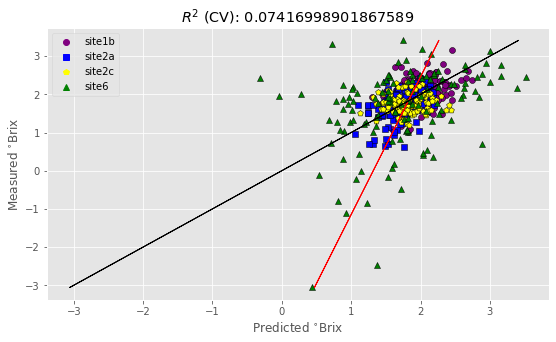

In [20]:
# opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(X_la_ymax, y_la_max, 20)

file_name_la_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,
                             y_la_max,
                             y_la_max_df_array,
                             ncomp_la_max, labels,file_name_la_max)

30/30 components processed
Optimized number of PLS components: 17
Wavelengths to keep from index: 394
Optimized MSEP: 0.2961280665522756
R2 calib: 0.859
R2 CV: 0.804
MSE calib: 0.058
MSE CV: 0.081
0.26075959690372785 0.7921491865954948
None
0 site1b 0.6514135069392207 [0.69964635] site1b_023_040_clipped.tif
1 site1b 0.7133237604407661 [0.60933052] site1b_024_016_clipped.tif
2 site1b 0.8444547228255678 [0.75762229] site1b_024_018_clipped.tif
3 site1b 0.8680173629538733 [0.5648865] site1b_024_022_clipped.tif
4 site1b 0.9221715903048969 [0.64937031] site1b_024_030_clipped.tif
5 site1b 1.0106287876392013 [0.77289237] site1b_024_031_clipped.tif
6 site1b 0.7068605226164735 [0.82179994] site1b_025_007_clipped.tif
7 site1b 0.7660492004085967 [0.67460855] site1b_025_018_clipped.tif
8 site1b 0.7040442159899356 [0.72087098] site1b_025_019_clipped.tif
9 site1b 0.8749171444638669 [0.70340529] site1b_025_026_clipped.tif
10 site1b 0.8596915469679627 [0.73605304] site1b_025_031_clipped.tif
11 site1b 0

292 site2c 0.7860511191319113 [0.83836911] site2c_018_012_clipped.tif
293 site2c 1.0228418332769391 [0.75207326] site2c_018_013_clipped.tif
294 site2c 0.9974862778907775 [0.86084224] site2c_018_015_clipped.tif
295 site2c 0.9008820433642282 [0.86768341] site2c_018_016_clipped.tif
296 site2c 0.9932114554336634 [1.03550644] site2c_018_018_clipped.tif
297 site2c 1.0312975259382533 [0.8742509] site2c_018_020_clipped.tif
298 site2c 1.002029766906279 [0.90629062] site2c_018_021_clipped.tif
299 site2c 0.8606598631367962 [0.89932838] site2c_018_022_clipped.tif
300 site2c 1.055980729465934 [1.18405023] site2c_018_024_clipped.tif
301 site2c 1.028308348683714 [1.28715193] site2c_018_027_clipped.tif
302 site2c 0.9625942870356924 [1.15631547] site2c_018_028_clipped.tif
303 site2c 1.0940271279095104 [1.00287864] site2c_018_030_clipped.tif
304 site2c 1.0968922612086955 [1.12780741] site2c_019_006_clipped.tif
305 site2c 1.0378705125902412 [0.99354365] site2c_019_008_clipped.tif
306 site2c 0.91488959927

Filenames meeting the conditions:


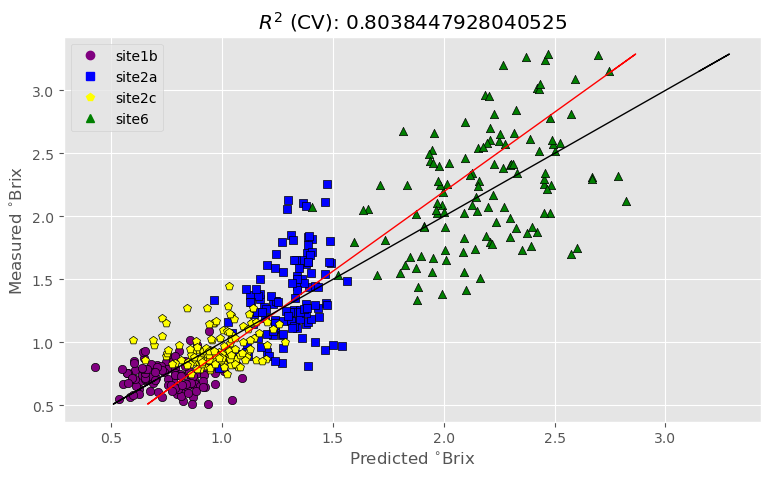

In [44]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(X_la_std, y_la_std, 30)


file_name_la_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,
                             y_la_std,
                             y_la_std_df_array,
                             ncomp_la_std, labels, file_name_la_std)

# SLA

In [45]:
sla_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_sla.npy',  allow_pickle=True)

In [46]:
y_sla_max = np.array(sla_trait_pdf_ymax)
y_sla_std = np.array(sla_trait_pdf_std)

In [47]:
y_sla_max_df = pd.DataFrame(y_sla_max, columns=['y_value', 'filename'])
y_sla_max_df['filename'] = y_sla_max_df['filename'].str.replace('sla_', '')

y_sla_max_df['y_value'] = pd.to_numeric(y_sla_max_df['y_value'])
y_sla_max_df_array = y_sla_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_sla_max_df = pd.merge(df_spectral, y_sla_max_df, on='filename')
 # Band columns as predictors
    
X_sla_ymax = merged_y_sla_max_df.filter(regex='^band_').values 
y_sla_max = merged_y_sla_max_df[['y_value']].values  

In [48]:
y_sla_std_df = pd.DataFrame(y_sla_std, columns=['y_value', 'filename'])
y_sla_std_df['filename'] = y_sla_std_df['filename'].str.replace('sla_', '')

y_sla_std_df['y_value'] = pd.to_numeric(y_sla_std_df['y_value'])
y_sla_std_df_array = y_sla_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_sla_std_df = pd.merge(df_spectral, y_sla_std_df, on='filename')
 # Band columns as predictors
    
X_sla_std = merged_y_sla_std_df.filter(regex='^band_').values 
y_sla_std = merged_y_sla_std_df[['y_value']].values  

30/30 components processed
Optimized number of PLS components: 15
Wavelengths to keep from index: 346
Optimized MSEP: 0.06702381370836984
R2 calib: 0.790
R2 CV: 0.701
MSE calib: 0.003
MSE CV: 0.004
1.2316540664027518 0.7293559238064359
None
0 site1b 4.545561075765736 [4.48956501] site1b_023_040_clipped.tif
1 site1b 4.583349867444741 [4.59242213] site1b_024_016_clipped.tif
2 site1b 4.551952023190844 [4.61725812] site1b_024_018_clipped.tif
3 site1b 4.574978239405329 [4.62385111] site1b_024_022_clipped.tif
4 site1b 4.5505278108660026 [4.62552283] site1b_024_030_clipped.tif
5 site1b 4.560802005726125 [4.6311731] site1b_024_031_clipped.tif
6 site1b 4.560814813527692 [4.66504033] site1b_025_007_clipped.tif
7 site1b 4.551636805415447 [4.49488481] site1b_025_018_clipped.tif
8 site1b 4.565853564593718 [4.55783656] site1b_025_019_clipped.tif
9 site1b 4.553060416361279 [4.57861805] site1b_025_026_clipped.tif
10 site1b 4.584706192295987 [4.59928844] site1b_025_031_clipped.tif
11 site1b 4.537874922

258 site2c 4.565002200536054 [4.53777094] site2c_015_009_clipped.tif
259 site2c 4.481354838219943 [4.43776959] site2c_015_011_clipped.tif
260 site2c 4.4279280768432665 [4.48257701] site2c_015_013_clipped.tif
261 site2c 4.49665073995281 [4.53323378] site2c_015_015_clipped.tif
262 site2c 4.468933518585258 [4.46510881] site2c_015_016_clipped.tif
263 site2c 4.434554641932145 [4.44186427] site2c_015_018_clipped.tif
264 site2c 4.469914209912546 [4.38216002] site2c_015_022_clipped.tif
265 site2c 4.5322556196008605 [4.58003901] site2c_016_006_clipped.tif
266 site2c 4.48720700685298 [4.50977018] site2c_016_009_clipped.tif
267 site2c 4.439570871868242 [4.45507203] site2c_016_011_clipped.tif
268 site2c 4.439043743255104 [4.40199276] site2c_016_012_clipped.tif
269 site2c 4.482310792378935 [4.51176738] site2c_016_014_clipped.tif
270 site2c 4.443722383651731 [4.48837984] site2c_016_016_clipped.tif
271 site2c 4.466490539333 [4.51377807] site2c_016_018_clipped.tif
272 site2c 4.467749342480563 [4.52309

Filenames meeting the conditions:


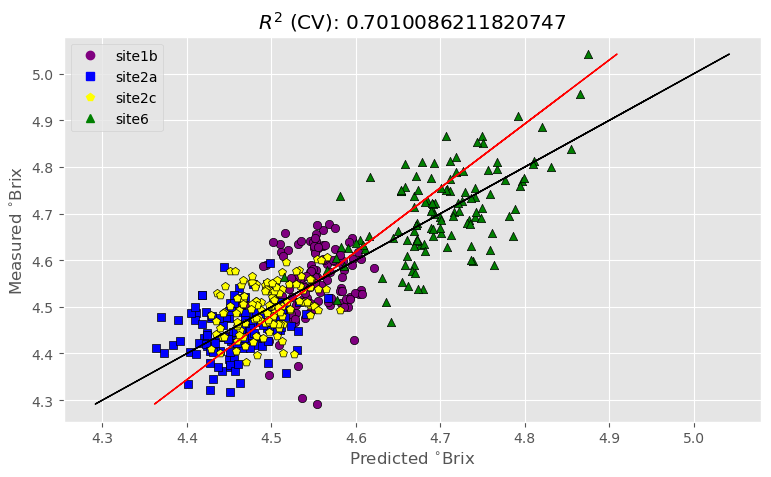

In [49]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(X_sla_ymax, y_sla_max, 30)

file_name_sla_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,
                             y_sla_max,
                             y_sla_max_df_array,
                             ncomp_sla_max, labels, file_name_sla_max)

In [50]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(X_sla_std, y_sla_std, 30)





30/30 components processed
Optimized number of PLS components: 24
Wavelengths to keep from index: 344
Optimized MSEP: 0.048008441937120803


R2 calib: 0.924
R2 CV: 0.831
MSE calib: 0.001
MSE CV: 0.002
0.04932375595805309 0.8192118386807096
None
0 site1b 0.19604451058809008 [0.16204565] site1b_023_040_clipped.tif
1 site1b 0.18693228910533782 [0.16763882] site1b_024_016_clipped.tif
2 site1b 0.22392667442614428 [0.15225958] site1b_024_018_clipped.tif
3 site1b 0.19463705319096458 [0.12875785] site1b_024_022_clipped.tif
4 site1b 0.18517665114767473 [0.18757342] site1b_024_030_clipped.tif
5 site1b 0.22727501499900263 [0.18964413] site1b_024_031_clipped.tif
6 site1b 0.21814667735871401 [0.19463283] site1b_025_007_clipped.tif
7 site1b 0.19275528944064718 [0.16345547] site1b_025_018_clipped.tif
8 site1b 0.21147219276368284 [0.1816621] site1b_025_019_clipped.tif
9 site1b 0.17392633378632877 [0.15243974] site1b_025_026_clipped.tif
10 site1b 0.225609152588072 [0.19096326] site1b_025_031_clipped.tif
11 site1b 0.20001675695819135 [0.19217787] site1b_025_033_clipped.tif
12 site1b 0.2009386011317378 [0.2242618] site1b_025_035_clipped.tif
1

151 site2a 0.2603598902672164 [0.31445976] site2a_016_024_clipped.tif
152 site2a 0.2946864002440135 [0.30792563] site2a_016_025_clipped.tif
153 site2a 0.28180601125272947 [0.33923011] site2a_016_027_clipped.tif
154 site2a 0.25515371057460234 [0.25430075] site2a_016_031_clipped.tif
155 site2a 0.2621675234105131 [0.2847105] site2a_016_032_clipped.tif
156 site2a 0.26083357718983796 [0.29220931] site2a_017_018_clipped.tif
157 site2a 0.26697681921664373 [0.27509438] site2a_017_021_clipped.tif
158 site2a 0.2325143604250362 [0.25590137] site2a_017_022_clipped.tif
159 site2a 0.28901386620809405 [0.28237963] site2a_017_027_clipped.tif
160 site2a 0.2758701942814221 [0.25069263] site2a_017_029_clipped.tif
161 site2a 0.2879565993097808 [0.2667362] site2a_017_031_clipped.tif
162 site2a 0.27543836519370674 [0.24827605] site2a_017_032_clipped.tif
163 site2a 0.2699414092025064 [0.25213779] site2a_018_017_clipped.tif
164 site2a 0.2720858310380559 [0.25194203] site2a_018_018_clipped.tif
165 site2a 0.231

450 site6 0.4652854219705497 [0.49928062] site6_027_037_clipped.tif
451 site6 0.4355969429545068 [0.4826936] site6_028_035_clipped.tif
452 site6 0.415606865010059 [0.4764832] site6_028_036_clipped.tif
453 site6 0.5002566345282011 [0.57784409] site6_029_031_clipped.tif
454 site6 0.4924666939166833 [0.54021877] site6_029_033_clipped.tif
455 site6 0.4435936839885265 [0.52343477] site6_029_034_clipped.tif
456 site6 0.41539926070428473 [0.45760397] site6_030_030_clipped.tif
457 site6 0.4411364730340621 [0.54138357] site6_030_032_clipped.tif
458 site6 0.4564561902022381 [0.49588498] site6_030_033_clipped.tif
459 site6 0.39925591573365515 [0.40408369] site6_031_027_clipped.tif
460 site6 0.4590109648255708 [0.58004589] site6_031_031_clipped.tif
461 site6 0.4084952553736295 [0.50857132] site6_031_032_clipped.tif
462 site6 0.3533461816871047 [0.37905504] site6_032_025_clipped.tif
463 site6 0.3990074764962359 [0.36206869] site6_032_026_clipped.tif
464 site6 0.38920185513518774 [0.50096945] site6_

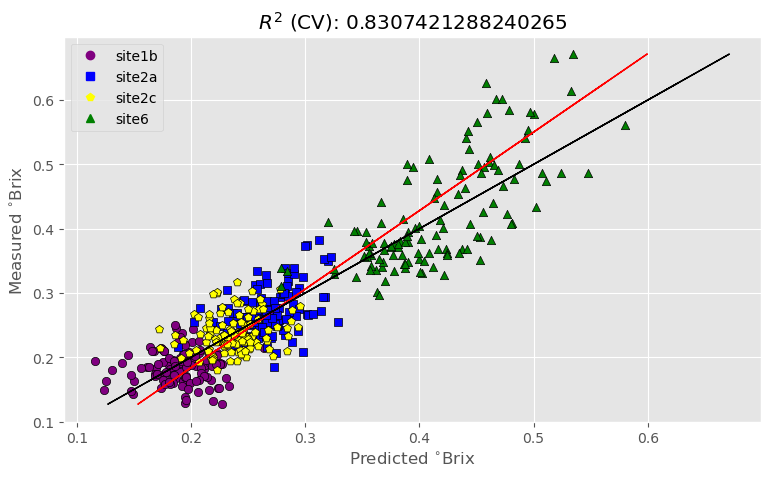

In [51]:

file_name_sla_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,
                             y_sla_std,
                             y_sla_std_df_array,
                             ncomp_sla_std, labels, file_name_sla_std)

# LDMC

In [52]:
ldmc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_ldmc.npy',  allow_pickle=True)

In [53]:
ldmc_trait_pdf_ymax.shape

(491, 2)

In [54]:

y_ldmc_max = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std = np.array(ldmc_trait_pdf_std)

In [55]:
y_ldmc_max_df = pd.DataFrame(ldmc_trait_pdf_ymax, columns=['y_value', 'filename'])
y_ldmc_max_df['filename'] = y_ldmc_max_df['filename'].str.replace('ldmc_', '')

y_ldmc_max_df['y_value'] = pd.to_numeric(y_ldmc_max_df['y_value'])
y_ldmc_max_df_array = y_ldmc_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_ldmc_max_df = pd.merge(df_spectral, y_ldmc_max_df, on='filename')
 # Band columns as predictors
    
X_ldmc_ymax = merged_y_ldmc_max_df.filter(regex='^band_').values 
y_ldmc_max = merged_y_ldmc_max_df[['y_value']].values  

In [56]:
y_ldmc_std_df = pd.DataFrame(ldmc_trait_pdf_std, columns=['y_value', 'filename'])
y_ldmc_std_df['filename'] = y_ldmc_std_df['filename'].str.replace('ldmc_', '')

y_ldmc_std_df['y_value'] = pd.to_numeric(y_ldmc_std_df['y_value'])
y_ldmc_std_df_array = y_ldmc_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_ldmc_std_df = pd.merge(df_spectral, y_ldmc_std_df, on='filename')
 # Band columns as predictors
    
X_ldmc_std = merged_y_ldmc_std_df.filter(regex='^band_').values 
y_ldmc_std = merged_y_ldmc_std_df[['y_value']].values  

In [57]:
X_ldmc_std.shape

(491, 425)

In [58]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(X_ldmc_ymax, y_ldmc_max, 20)


20/20 components processed
Optimized number of PLS components: 18
Wavelengths to keep from index: 371
Optimized MSEP: 0.10703187778914931


R2 calib: 0.441
R2 CV: -0.011
MSE calib: 0.007
MSE CV: 0.013
-0.41761705209638994 0.2573900765218436
None
0 site1b -0.6000780729507549 [-0.62282683] site1b_023_040_clipped.tif
1 site1b -0.5546813023488613 [-0.69297354] site1b_024_016_clipped.tif
2 site1b -0.5663935042811514 [-0.71785769] site1b_024_018_clipped.tif
3 site1b -0.6436214399193723 [-0.61530884] site1b_024_022_clipped.tif
4 site1b -0.5802497785332615 [-0.66806243] site1b_024_030_clipped.tif
5 site1b -0.6136341448569602 [-0.75825517] site1b_024_031_clipped.tif
6 site1b -0.506329332342377 [-0.60349854] site1b_025_007_clipped.tif
7 site1b -0.6576080925685719 [-0.67876123] site1b_025_018_clipped.tif
8 site1b -0.6400822224197751 [-0.60225061] site1b_025_019_clipped.tif
9 site1b -0.5550266767445595 [-0.68803545] site1b_025_026_clipped.tif
10 site1b -0.5564378280200174 [-0.62553207] site1b_025_031_clipped.tif
11 site1b -0.5420191516340014 [-0.60360584] site1b_025_033_clipped.tif
12 site1b -0.5956739552473124 [-0.64354278] site1b_02

244 site2c -0.4953728771589725 [-0.52700254] site2c_012_009_clipped.tif
245 site2c -0.5408723930648046 [-0.70475729] site2c_012_012_clipped.tif
246 site2c -0.6087585903505123 [-0.48213477] site2c_013_007_clipped.tif
247 site2c -0.5625283780823301 [-0.63647903] site2c_013_009_clipped.tif
248 site2c -0.5933098313051146 [-0.68100322] site2c_013_012_clipped.tif
249 site2c -0.6000396083114312 [-0.5291639] site2c_013_014_clipped.tif
250 site2c -0.5785337924148007 [-0.45421935] site2c_014_006_clipped.tif
251 site2c -0.5304896312140889 [-0.56956254] site2c_014_008_clipped.tif
252 site2c -0.5694574747605301 [-0.62340373] site2c_014_011_clipped.tif
253 site2c -0.5551670345572611 [-0.56668717] site2c_014_013_clipped.tif
254 site2c -0.43808822510033 [-0.34037711] site2c_014_016_clipped.tif
255 site2c -0.4938627008517602 [-0.43127457] site2c_014_018_clipped.tif
256 site2c -0.6320277826752584 [-0.48104551] site2c_015_006_clipped.tif
257 site2c -0.5513213740262644 [-0.64126271] site2c_015_008_clipped

444 site6 -0.4504677211930893 [-0.37581389] site6_025_038_clipped.tif
445 site6 -0.5870074841555619 [-0.39870735] site6_025_039_clipped.tif
446 site6 -0.9144969140984842 [-0.98857366] site6_026_035_clipped.tif
447 site6 -0.5855772352520907 [-0.74213843] site6_026_037_clipped.tif
448 site6 -0.6062406565789515 [-0.22364703] site6_026_038_clipped.tif
449 site6 -0.6512995735009842 [-0.5413574] site6_027_036_clipped.tif
450 site6 -0.580022407886776 [-0.66382995] site6_027_037_clipped.tif
451 site6 -0.9225415153510326 [-0.88450442] site6_028_035_clipped.tif
452 site6 -0.4930716538634843 [-0.94497461] site6_028_036_clipped.tif
453 site6 -0.6299139826104749 [-0.42401928] site6_029_031_clipped.tif
454 site6 -0.640506231139817 [-0.55179342] site6_029_033_clipped.tif
455 site6 -0.6015686332513086 [-0.44607016] site6_029_034_clipped.tif
456 site6 -0.48933218485744734 [-0.73175916] site6_030_030_clipped.tif
457 site6 -0.608849359442173 [-0.35483375] site6_030_032_clipped.tif
458 site6 -0.7098548344

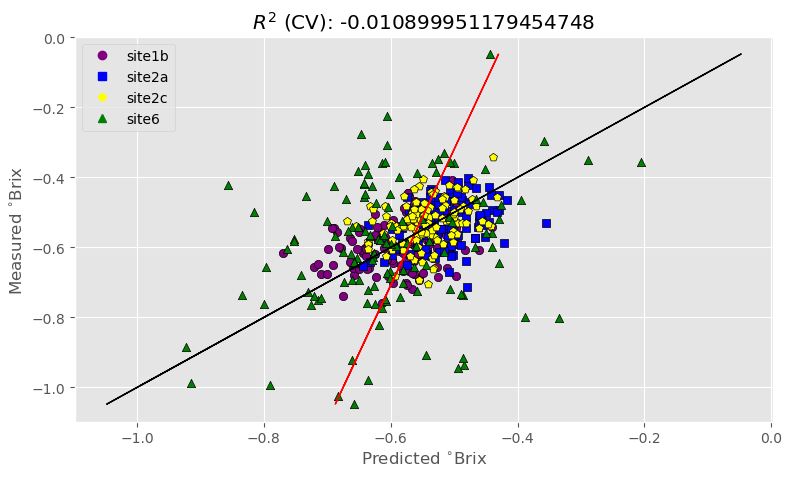

In [59]:
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,
                             y_ldmc_max,
                             y_ldmc_max_df_array,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [60]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(X_ldmc_std, y_ldmc_std, 50)



50/50 components processed
Optimized number of PLS components: 44
Wavelengths to keep from index: 361
Optimized MSEP: 0.06141807515310569


R2 calib: 0.949
R2 CV: 0.876
MSE calib: 0.001
MSE CV: 0.003
0.03695467931837333 0.8960508569791876
None
0 site1b 0.25747394385830047 [0.17780381] site1b_023_040_clipped.tif
1 site1b 0.1899801645632067 [0.17099825] site1b_024_016_clipped.tif
2 site1b 0.21993409092578142 [0.18115435] site1b_024_018_clipped.tif
3 site1b 0.24395661192947016 [0.18739014] site1b_024_022_clipped.tif
4 site1b 0.26968105022972144 [0.19320672] site1b_024_030_clipped.tif
5 site1b 0.26308274624614286 [0.17306973] site1b_024_031_clipped.tif
6 site1b 0.24181870388682908 [0.20449816] site1b_025_007_clipped.tif
7 site1b 0.1963220014315208 [0.2014424] site1b_025_018_clipped.tif
8 site1b 0.17531583227283137 [0.20208675] site1b_025_019_clipped.tif
9 site1b 0.22600437830969122 [0.19268821] site1b_025_026_clipped.tif
10 site1b 0.26411418954882526 [0.23520658] site1b_025_031_clipped.tif
11 site1b 0.2472486535055442 [0.21247105] site1b_025_033_clipped.tif
12 site1b 0.2377209477715418 [0.21547628] site1b_025_035_clipped.tif
1

364 site2c 0.24716080969639903 [0.28329239] site2c_027_027_clipped.tif
365 site2c 0.3122263469919558 [0.26236841] site2c_027_030_clipped.tif
366 site2c 0.27901222893779076 [0.2861305] site2c_028_028_clipped.tif
367 site2c 0.2760528701522601 [0.27708894] site2c_028_031_clipped.tif
368 site6 0.5334119743106599 [0.43212988] site6_009_054_clipped.tif
369 site6 0.4727099569203894 [0.52755973] site6_009_057_clipped.tif
370 site6 0.5522212067405435 [0.48202994] site6_010_055_clipped.tif
371 site6 0.43597612469533686 [0.44350256] site6_010_056_clipped.tif
372 site6 0.4998273829744375 [0.56368459] site6_010_057_clipped.tif
373 site6 0.6415528365223845 [0.59372754] site6_010_058_clipped.tif
374 site6 0.45121059424746784 [0.46352453] site6_011_054_clipped.tif
375 site6 0.4818977083211867 [0.50915] site6_011_055_clipped.tif
376 site6 0.5217898265080807 [0.52813888] site6_011_056_clipped.tif
377 site6 0.5241612456474499 [0.59284983] site6_011_057_clipped.tif
378 site6 0.4497297673534045 [0.52404314

Filenames meeting the conditions:


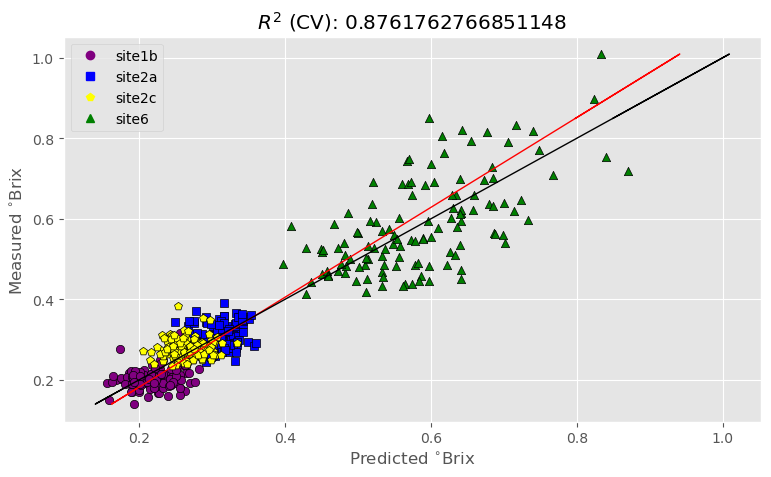

In [61]:
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,
                             y_ldmc_std,
                             y_ldmc_std_df_array,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)




# simple_pls_cv_label_category(opt_Xc_ldmc_std,
#                              y_ldmc_std,
#                              merged_y_ldmc_std_df,
#                              ncomp_ldmc_std, labels, file_name_ldmc_max)

# PN

In [12]:
pn_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_pn.npy',  allow_pickle=True)
pn_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_pn.npy',  allow_pickle=True)

In [13]:
y_pn_max = np.array(pn_trait_pdf_ymax)

y_pn_std = np.array(pn_trait_pdf_std)

In [14]:
y_pn_max.shape

(491, 2)

In [15]:
y_pn_max_df = pd.DataFrame(y_pn_max, columns=['y_value', 'filename'])
y_pn_max_df['filename'] = y_pn_max_df['filename'].str.replace('pn_', '')

y_pn_max_df['y_value'] = pd.to_numeric(y_pn_max_df['y_value'])
y_pn_max_df_array = y_pn_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pn_max_df = pd.merge(df_spectral, y_pn_max_df, on='filename')
 # Band columns as predictors
    
X_pn_ymax = merged_y_pn_max_df.filter(regex='^band_').values 
y_pn_max = merged_y_pn_max_df[['y_value']].values  

In [16]:
y_pn_std_df = pd.DataFrame(y_pn_std, columns=['y_value', 'filename'])
y_pn_std_df['filename'] = y_pn_std_df['filename'].str.replace('pn_', '')

y_pn_std_df['y_value'] = pd.to_numeric(y_pn_std_df['y_value'])
y_pn_std_df_array = y_pn_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pn_std_df = pd.merge(df_spectral, y_pn_std_df, on='filename')
 # Band columns as predictors
    
X_pn_std = merged_y_pn_std_df.filter(regex='^band_').values 
y_pn_std = merged_y_pn_std_df[['y_value']].values  

20/20 components processed
Optimized number of PLS components: 18
Wavelengths to keep from index: 358
Optimized MSEP: 0.3024544049333324
R2 calib: 0.508
R2 CV: 0.152
MSE calib: 0.047
MSE CV: 0.081
0.3148314487721934 0.2787533748458759
None
0 site1b 0.38219346409909033 [0.17573313] site1b_023_040_clipped.tif
1 site1b 0.2910884337335152 [0.448474] site1b_024_016_clipped.tif
2 site1b 0.21809045285896206 [0.5702366] site1b_024_018_clipped.tif
3 site1b 0.09153605376280366 [0.37622622] site1b_024_022_clipped.tif
4 site1b 0.28163831665874445 [0.46791926] site1b_024_030_clipped.tif
5 site1b 0.4190258177983495 [0.47249887] site1b_024_031_clipped.tif
6 site1b 0.2891593163377118 [0.36982399] site1b_025_007_clipped.tif
7 site1b 0.2207864917379037 [0.5592607] site1b_025_018_clipped.tif
8 site1b 0.4083602251997643 [0.44670677] site1b_025_019_clipped.tif
9 site1b 0.09162725812304423 [0.31244577] site1b_025_026_clipped.tif
10 site1b 0.4203205897941334 [0.32021115] site1b_025_031_clipped.tif
11 site1b 

264 site2c 0.22414228293511312 [0.27009017] site2c_015_022_clipped.tif
265 site2c 0.6686349859291474 [0.7188525] site2c_016_006_clipped.tif
266 site2c 0.46783710743266194 [0.50125653] site2c_016_009_clipped.tif
267 site2c 0.34531122658062086 [0.65440928] site2c_016_011_clipped.tif
268 site2c 0.5313815410014769 [0.60455026] site2c_016_012_clipped.tif
269 site2c 0.561878433676974 [0.40795442] site2c_016_014_clipped.tif
270 site2c 0.2830647182024841 [0.35613207] site2c_016_016_clipped.tif
271 site2c 0.10201625583241042 [0.29853367] site2c_016_018_clipped.tif
272 site2c 0.2741191968478444 [0.32956392] site2c_016_019_clipped.tif
273 site2c 0.1702583855076269 [0.31089603] site2c_016_021_clipped.tif
274 site2c 0.38692766453137034 [0.15665809] site2c_016_022_clipped.tif
275 site2c 0.24971839102625543 [0.45354831] site2c_016_024_clipped.tif
276 site2c 0.6746182818698041 [0.60612865] site2c_017_006_clipped.tif
277 site2c 0.3534075110648603 [0.56434267] site2c_017_008_clipped.tif
278 site2c 0.516

Filenames meeting the conditions:
site6_024_039_clipped.tif


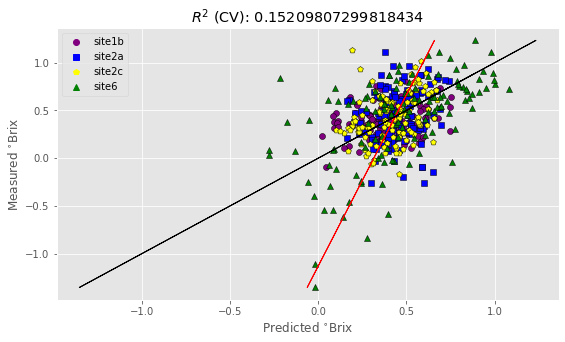

In [17]:
opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(X_pn_ymax, y_pn_max, 20)

file_name_pn_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\pn_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pn_max,
                             y_pn_max,
                             y_pn_max_df_array,
                             ncomp_pn_max, labels, file_name_pn_max)

50/50 components processed
Optimized number of PLS components: 16
Wavelengths to keep from index: 277
Optimized MSEP: 0.14103068160264884
R2 calib: 0.849
R2 CV: 0.635
MSE calib: 0.007
MSE CV: 0.018
0.1588283093569466 0.7279287005591623
None
0 site1b 0.3215935653992029 [0.26590409] site1b_023_040_clipped.tif
1 site1b 0.4586795874234283 [0.19722823] site1b_024_016_clipped.tif
2 site1b 0.4382763579537855 [0.22223789] site1b_024_018_clipped.tif
3 site1b 0.38705826888847294 [0.23592101] site1b_024_022_clipped.tif
4 site1b 0.5313874253763267 [0.21768625] site1b_024_030_clipped.tif
5 site1b 0.6115207415600603 [0.23291514] site1b_024_031_clipped.tif
6 site1b 0.428003576693465 [0.44277495] site1b_025_007_clipped.tif
7 site1b 0.4227147674587802 [0.27347998] site1b_025_018_clipped.tif
8 site1b 0.5175096174736212 [0.29247148] site1b_025_019_clipped.tif
9 site1b 0.477370773830324 [0.2228272] site1b_025_026_clipped.tif
10 site1b 0.4829861619403699 [0.33379527] site1b_025_031_clipped.tif
11 site1b 0.

295 site2c 0.7227409091074034 [0.56950791] site2c_018_016_clipped.tif
296 site2c 0.6380859233966358 [0.68944376] site2c_018_018_clipped.tif
297 site2c 0.6058535359564572 [0.7208254] site2c_018_020_clipped.tif
298 site2c 0.5736886465258723 [0.71288821] site2c_018_021_clipped.tif
299 site2c 0.6256232216205296 [0.74146753] site2c_018_022_clipped.tif
300 site2c 0.7796685666972755 [0.80301058] site2c_018_024_clipped.tif
301 site2c 0.6373330752598079 [0.84983371] site2c_018_027_clipped.tif
302 site2c 0.669915242065843 [0.72424884] site2c_018_028_clipped.tif
303 site2c 0.6564967563003037 [0.71013346] site2c_018_030_clipped.tif
304 site2c 0.7869618427290189 [0.83580824] site2c_019_006_clipped.tif
305 site2c 0.689456219822667 [0.68267302] site2c_019_008_clipped.tif
306 site2c 0.7498554948321431 [0.71664876] site2c_019_010_clipped.tif
307 site2c 0.5843791942781946 [0.71520579] site2c_019_011_clipped.tif
308 site2c 0.6661573606922121 [0.56245007] site2c_019_012_clipped.tif
309 site2c 0.7857606710

Filenames meeting the conditions:


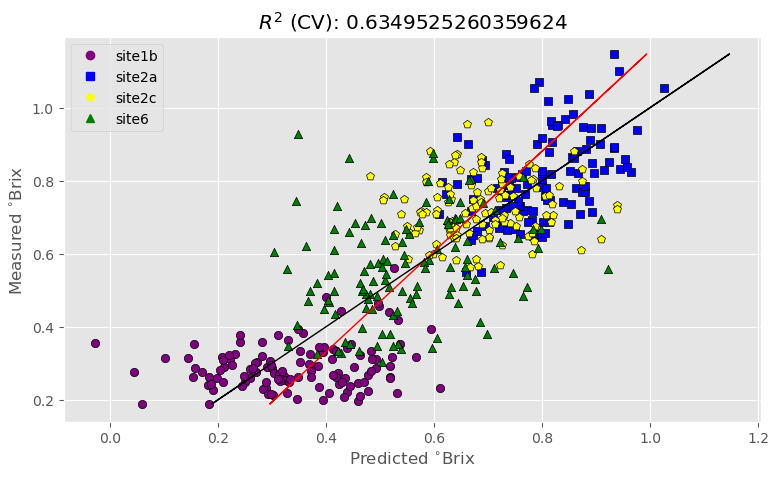

In [30]:
opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(X_pn_std, y_pn_std, 50)


file_name_pn_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\pn_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pn_std,
                             y_pn_std,
                             y_pn_std_df_array,
                             ncomp_pn_std, labels, file_name_pn_std)

# PC

In [62]:
pc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\numpy\std_pc.npy',  allow_pickle=True)

In [63]:
y_pc_max = np.array(pc_trait_pdf_ymax)

y_pc_std = np.array(pc_trait_pdf_std)

In [64]:
y_pc_max_df = pd.DataFrame(y_pc_max, columns=['y_value', 'filename'])
y_pc_max_df['filename'] = y_pc_max_df['filename'].str.replace('pc_', '')

y_pc_max_df['y_value'] = pd.to_numeric(y_pc_max_df['y_value'])
y_pc_max_df_array = y_pc_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pc_max_df = pd.merge(df_spectral, y_pc_max_df, on='filename')
 # Band columns as predictors
    
X_pc_ymax = merged_y_pc_max_df.filter(regex='^band_').values 
y_pc_max = merged_y_pc_max_df[['y_value']].values  

In [65]:
y_pc_std_df = pd.DataFrame(y_pc_std, columns=['y_value', 'filename'])
y_pc_std_df['filename'] = y_pc_std_df['filename'].str.replace('pc_', '')

y_pc_std_df['y_value'] = pd.to_numeric(y_pc_std_df['y_value'])
y_pc_std_df_array = y_pc_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pc_std_df = pd.merge(df_spectral, y_pc_std_df, on='filename')
 # Band columns as predictors
    
X_pc_std = merged_y_pc_std_df.filter(regex='^band_').values 
y_pc_std = merged_y_pc_std_df[['y_value']].values  

30/30 components processed
Optimized number of PLS components: 1
Wavelengths to keep from index: 395
Optimized MSEP: 0.03654830953106733
R2 calib: 0.242
R2 CV: 0.113
MSE calib: 0.001
MSE CV: 0.002
3.1092103797274437 0.1914761762193454
None
0 site1b 3.8358857541359903 [3.80015293] site1b_023_040_clipped.tif
1 site1b 3.8290588416705518 [3.79803301] site1b_024_016_clipped.tif
2 site1b 3.82754635957386 [3.82112714] site1b_024_018_clipped.tif
3 site1b 3.8311461175373958 [3.79396881] site1b_024_022_clipped.tif
4 site1b 3.835560545892635 [3.82387085] site1b_024_030_clipped.tif
5 site1b 3.8353623003390007 [3.81953021] site1b_024_031_clipped.tif
6 site1b 3.8246472157699896 [3.86290287] site1b_025_007_clipped.tif
7 site1b 3.828396264596624 [3.79851525] site1b_025_018_clipped.tif
8 site1b 3.8286699911403743 [3.82967531] site1b_025_019_clipped.tif
9 site1b 3.8318826750478143 [3.79904573] site1b_025_026_clipped.tif
10 site1b 3.8337925095203014 [3.81056248] site1b_025_031_clipped.tif
11 site1b 3.831

414 site6 3.894987628158358 [3.90293856] site6_019_048_clipped.tif
415 site6 3.8950492734391076 [3.7650723] site6_020_044_clipped.tif
416 site6 3.8916407850751717 [3.78087975] site6_020_045_clipped.tif
417 site6 3.8905475403440826 [3.90313842] site6_020_046_clipped.tif
418 site6 3.8975966206240362 [3.8816593] site6_020_047_clipped.tif
419 site6 3.8959405270776233 [3.84209233] site6_020_049_clipped.tif
420 site6 3.8891185457976394 [3.7658474] site6_021_040_clipped.tif
421 site6 3.888925862027251 [3.88312063] site6_021_043_clipped.tif
422 site6 3.888773488605816 [3.77707409] site6_021_044_clipped.tif
423 site6 3.8948815756682604 [3.87642263] site6_021_045_clipped.tif
424 site6 3.8928243711047954 [3.91377199] site6_021_046_clipped.tif
425 site6 3.89537927518382 [3.86165946] site6_021_048_clipped.tif
426 site6 3.889501960033143 [3.70562189] site6_022_039_clipped.tif
427 site6 3.890538786496483 [3.75418286] site6_022_041_clipped.tif
428 site6 3.889029727863974 [3.75886735] site6_022_042_cli

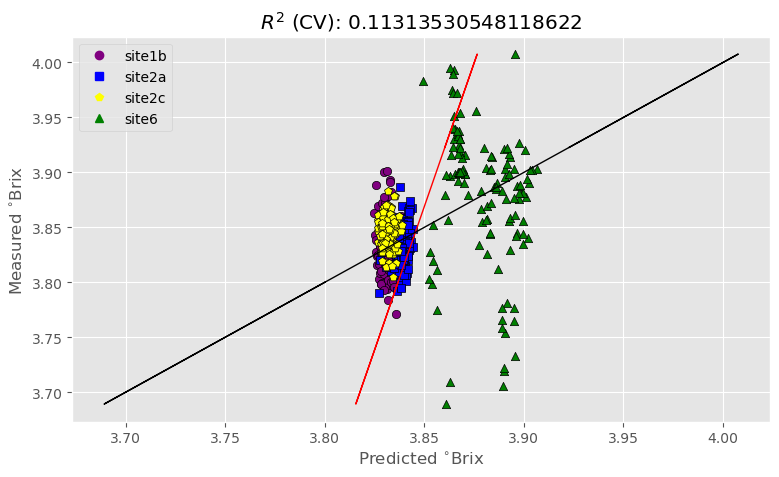

In [66]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(X_pc_ymax, y_pc_max, 30)

file_name_pc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,
                             y_pc_max,
                             y_pc_max_df_array,
                             ncomp_pc_max, labels, file_name_pc_max)

30/30 components processed
Optimized number of PLS components: 19
Wavelengths to keep from index: 386
Optimized MSEP: 0.014573758995548787
R2 calib: 0.883
R2 CV: 0.805
MSE calib: 0.000
MSE CV: 0.000
0.014883572677966092 0.7903924914494667
None
0 site1b 0.04191739972891912 [0.03565399] site1b_023_040_clipped.tif
1 site1b 0.04064909653262449 [0.03184692] site1b_024_016_clipped.tif
2 site1b 0.05355092129717872 [0.03896749] site1b_024_018_clipped.tif
3 site1b 0.04646305662801847 [0.03626182] site1b_024_022_clipped.tif
4 site1b 0.04735249207559987 [0.04041052] site1b_024_030_clipped.tif
5 site1b 0.05141431706437222 [0.03939642] site1b_024_031_clipped.tif
6 site1b 0.05473127603251003 [0.04685125] site1b_025_007_clipped.tif
7 site1b 0.042317144084058934 [0.04051474] site1b_025_018_clipped.tif
8 site1b 0.05332695518134363 [0.04415108] site1b_025_019_clipped.tif
9 site1b 0.045058519081319075 [0.04217989] site1b_025_026_clipped.tif
10 site1b 0.04933088829181576 [0.04675533] site1b_025_031_clippe

274 site2c 0.06233529994636866 [0.06817475] site2c_016_022_clipped.tif
275 site2c 0.07020457412020492 [0.06994192] site2c_016_024_clipped.tif
276 site2c 0.058525472184281606 [0.05520137] site2c_017_006_clipped.tif
277 site2c 0.05797374211028096 [0.05656574] site2c_017_008_clipped.tif
278 site2c 0.062065405562726855 [0.05336861] site2c_017_009_clipped.tif
279 site2c 0.06367668466948495 [0.0608044] site2c_017_011_clipped.tif
280 site2c 0.0613154809572095 [0.05034094] site2c_017_013_clipped.tif
281 site2c 0.05878148237284631 [0.05578284] site2c_017_014_clipped.tif
282 site2c 0.06523515092212939 [0.061242] site2c_017_016_clipped.tif
283 site2c 0.0749722411555936 [0.0602451] site2c_017_017_clipped.tif
284 site2c 0.05608344994700648 [0.05086338] site2c_017_019_clipped.tif
285 site2c 0.06267585257152965 [0.05608309] site2c_017_022_clipped.tif
286 site2c 0.0691985389572817 [0.06253227] site2c_017_023_clipped.tif
287 site2c 0.06783557869127758 [0.08101024] site2c_017_026_clipped.tif
288 site2c 

Filenames meeting the conditions:


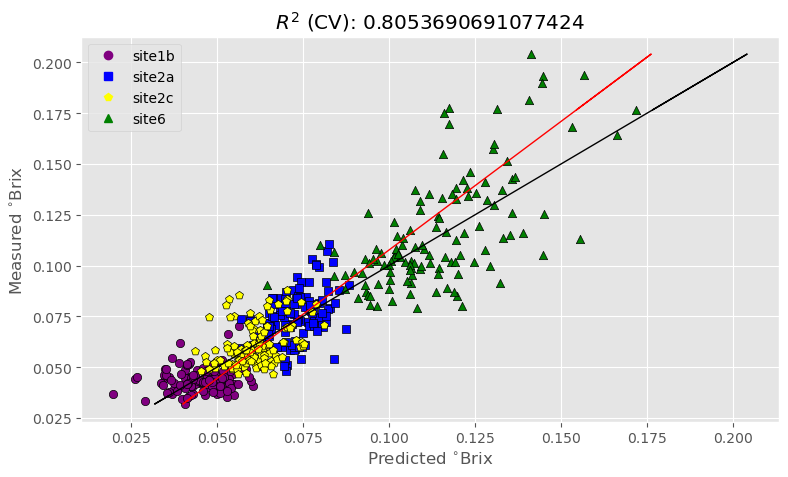

In [67]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(X_pc_std, y_pc_std, 30)


file_name_pc_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples5\csv\pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,
                             y_pc_std,
                             y_pc_std_df_array,
                             ncomp_pc_std, labels, file_name_pc_std)

In [83]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_std, y_pc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_std][wav_pc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(101,) (101,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.08305604,  0.02563276,  0.07001932, -0.07330928, -0.02959904,
       -0.06181238,  0.05166224,  0.0423939 ,  0.08608444,  0.03241446,
        0.00589102,  0.03105683,  0.03610003, -0.07109218, -0.01392581,
       -0.08098043,  0.05535809,  0.0436423 ,  0.06043147, -0.09003709,
       -0.03564026, -0.06876465, -0.02642302,  0.01485242,  0.07402576,
        0.03041181,  0.06124964, -0.04902139,  0.04406641,  0.01223253,
       -0.04552591, -0.02248769, -0.06851422,  0.06682079, -0.01776066,
        0.01342628, -0.06237076,  0.0108453 , -0.02556704, -0.04705706,
       -0.04222951,  0.0637625 , -0.06987194,  0.08712824, -0.06206856,
        0.06909553, -0.06813872,  0.01971074,  0.04089133,  0.03832639,
        0.035126  , -0.06999792,  0.06964782,  0.00515899, -0.0722595 ,
        0.00646491, -0.0654743 , -0.07860738,  0.08014102,  0.07077531,
        0.08535242,  0.03833126, -0.07515243, -0.08364529,  0.06712663,
       -0.09733121,  0.07829827, -0.08182713,  0.06428929,  0.06

In [84]:
optimal_pls_sla.intercept_

array([0.15281088])

In [85]:
bands_sla

array(['band_331', 'band_133', 'band_332', 'band_349', 'band_156',
       'band_270', 'band_125', 'band_379', 'band_262', 'band_235',
       'band_52', 'band_236', 'band_404', 'band_96', 'band_268',
       'band_48', 'band_147', 'band_113', 'band_144', 'band_252',
       'band_217', 'band_352', 'band_162', 'band_58', 'band_170',
       'band_118', 'band_149', 'band_364', 'band_92', 'band_69',
       'band_81', 'band_34', 'band_396', 'band_373', 'band_185',
       'band_21', 'band_177', 'band_72', 'band_221', 'band_88',
       'band_393', 'band_148', 'band_61', 'band_137', 'band_40',
       'band_54', 'band_145', 'band_226', 'band_153', 'band_371',
       'band_389', 'band_178', 'band_94', 'band_233', 'band_65',
       'band_26', 'band_357', 'band_164', 'band_381', 'band_103',
       'band_85', 'band_44', 'band_143', 'band_355', 'band_258',
       'band_224', 'band_165', 'band_342', 'band_380', 'band_59',
       'band_220', 'band_24', 'band_176', 'band_337', 'band_42',
       'band_216'

In [2]:
import os
from collections import defaultdict

# Path to the folder containing the files
folder_path = r"D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\version4\d15n"

# Initialize a dictionary to store counts for each site
site_counts = defaultdict(set)

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file name contains a site identifier
    if any(site in file_name for site in ['site1b', 'site2a', 'site2c', 'site6']):
        # Extract the site identifier
        for site in ['site1b', 'site2a', 'site2c', 'site6']:
            if site in file_name:
                # Add the file name to the set for this site
                site_counts[site].add(file_name)
                break

# Calculate the number of unique items for each site
unique_counts = {site: len(files) for site, files in site_counts.items()}

# Print the results
for site, count in unique_counts.items():
    print(f"{site}: {count} unique files")


site1b: 161 unique files
site2a: 71 unique files
site2c: 90 unique files
site6: 161 unique files
